In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

import joblib
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteScaledError, MeanSquaredScaledError
from math import sqrt, ceil, floor

In [2]:
# import dataset from csv file
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [3]:
# drop stocks
train = train.drop(['udsStock'], axis=1)
test = test.drop(['udsStock'], axis=1)

In [4]:
results = pd.DataFrame(columns=['idSku', 'target', 'prediction', 'flag_promo', 'target_promo', 'prediction_promo', 'target_no_promo', 'prediction_no_promo'])

In [5]:
skus = train['idSku'].unique()

for s in skus:
    train_s = train[train['idSku'] == s]
    test_s = test[test['idSku'] == s]

    y_train = train_s['udsVenta']
    X_train = train_s.drop(['udsVenta', 'idSku', 'idSecuencia'], axis=1)

    y_test = test_s['udsVenta'].to_list()
    X_test = test_s.drop(['udsVenta', 'idSku', 'idSecuencia'], axis=1)

    path = '../XGBR_models/xgbr_' + str(s) + '.pkl'
    xgbr_m = joblib.load(path)

    pred = xgbr_m.predict(X_test).round().astype(int)
    pred[pred < 0] = 0

    promo = test_s['promo'].reset_index(drop=True)
    flag_promo = len(promo.value_counts())

    pred_promo, pred_no_promo, target_promo, target_no_promo = [], [], [], []

    for i in range(len(pred)):
        if promo[i] == 1:
            pred_promo.append(pred[i])
            target_promo.append(y_test[i])
        else:
            pred_no_promo.append(pred[i])
            target_no_promo.append(y_test[i])

    # create a list with idSku, target and prediction
    r = pd.DataFrame([s, y_test, pred, flag_promo, target_promo, pred_promo, target_no_promo, pred_no_promo,]).T
    r.columns = ['idSku', 'target', 'prediction', 'flag_promo','target_promo', 'prediction_promo', 'target_no_promo', 'prediction_no_promo']
    results = results.append(r, ignore_index=True)
    

C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\2401634674.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\2401634674.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\2401634674.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\2401634674.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)
C:\U

In [6]:
results

,idSku,target,prediction,flag_promo,target_promo,prediction_promo,target_no_promo,prediction_no_promo
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 6, 18, 27...","[1, 23, 28, 23, 13, 19, 17, 4, 15, 22, 17, 16,...",2,"[6, 18, 27, 0, 30, 18, 9, 21, 21, 12, 0, 12, 9...","[16, 20, 16, 4, 16, 16, 23, 21, 3, 12, 4, 17, ...","[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 18, 12, 2...","[1, 23, 28, 23, 13, 19, 17, 4, 15, 22, 17, 13,..."
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 15, 1...","[0, 19, 15, 11, 9, 14, 9, 1, 19, 7, 20, 18, 19...",2,"[15, 12, 12, 0, 9, 15, 18, 30, 27, 30, 0, 24, ...","[18, 19, 19, 0, 12, 6, 11, 12, 15, 20, 0, 11, ...","[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 6, 27...","[0, 19, 15, 11, 9, 14, 9, 1, 19, 7, 20, 11, 16..."
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 0, 6, 27,...","[0, 4, 14, 10, 11, 16, 7, 0, 5, 12, 2, 16, 11,...",2,"[0, 6, 27, 0, 3, 15, 0, 3, 0, 18, 0, 21, 12, 1...","[16, 11, 12, 0, 15, 11, 10, 6, 12, 11, 0, 10, ...","[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 3, 15, 6,...","[0, 4, 14, 10, 11, 16, 7, 0, 5, 12, 2, 13, 8, ..."
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 3, 6, 12, ...","[0, 21, 11, 14, 11, 7, 7, 0, 8, 7, 6, 6, 5, 9,...",2,"[3, 6, 12, 0, 12, 9, 9, 9, 6, 3, 0, 15, 0, 9, ...","[6, 5, 9, 0, 9, 11, 7, 5, 4, 5, 1, 8, 5, 11, 1...","[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 9, 6, 9, 3...","[0, 21, 11, 14, 11, 7, 7, 0, 8, 7, 6, 6, 3, 6,..."
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 7, 1, 0, ...",2,"[0, 3, 3, 0, 6, 3, 9, 9, 0, 9, 0, 21, 18, 12, ...","[1, 7, 1, 0, 0, 1, 8, 20, 11, 18, 0, 14, 13, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 15, 36, 9, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 14, 14, 24, ..."
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 3, 9, 15, 0...","[1, 10, 12, 8, 9, 11, 11, 2, 8, 8, 7, 8, 9, 13...",2,"[3, 9, 15, 0, 9, 24, 15, 24, 9, 12, 3, 30, 6, ...","[8, 9, 13, 0, 11, 11, 11, 7, 11, 9, 0, 16, 15,...","[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 0, 9, 6, 0,...","[1, 10, 12, 8, 9, 11, 11, 2, 8, 8, 7, 5, 3, 7,..."
6,7,"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[0, 9, 11, 7, 12, 12, 7, 0, 9, 17, 12, 14, 10,...",1,[],[],"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[0, 9, 11, 7, 12, 12, 7, 0, 9, 17, 12, 14, 10,..."
7,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 8, 15, 6, 0...","[0, 9, 10, 13, 8, 6, 11, 1, 13, 12, 15, 12, 15...",2,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 12, 6, 15, ...","[0, 9, 10, 13, 8, 6, 11, 1, 13, 12, 15, 9, 13,...","[8, 15, 6, 0, 6, 3, 0, 3, 0, 3, 0, 0, 0, 6, 9,...","[12, 15, 11, 2, 16, 19, 15, 17, 15, 17, 5, 15,..."
8,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 18, 15,...","[2, 12, 4, 7, 6, 11, 9, 4, 5, 10, 11, 7, 5, 8,...",2,"[18, 15, 14, 6, 15, 21, 21, 15, 15, 18, 9, 6, ...","[7, 5, 8, 3, 7, 7, 7, 7, 10, 10, 5, 7, 7, 6, 9...","[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 6, 15, ...","[2, 12, 4, 7, 6, 11, 9, 4, 5, 10, 11, 5, 8, 6,..."
9,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 6, 0, ...","[0, 11, 7, 11, 4, 6, 7, 5, 7, 4, 7, 7, 7, 6, 6...",2,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 0, 9, ...","[0, 11, 7, 11, 4, 6, 7, 5, 7, 4, 7, 8, 8, 13, ...","[9, 6, 0, 0, 15, 6, 10, 18, 9, 3, 0, 12, 0, 12...","[7, 7, 6, 6, 9, 5, 4, 5, 9, 7, 0, 6, 6, 7, 10,..."


In [7]:
# copy results
global_results = results.copy()
global_results = global_results[['idSku', 'target', 'prediction']]

In [8]:
# RMSE: Root Mean Squared Error
# MAPE: Mean Absolute Percentage Error
# MASE: Mean Absolute Scaled Error
# SMAPE: Symmetric Mean Absolute Percentage Error
# RMSSE: Root Mean Squared Scaled Error

global_results['RMSE'] = np.nan
global_results['MAPE'] = np.nan
global_results['MASE'] = np.nan
global_results['SMAPE'] = np.nan
global_results['RMSSE'] = np.nan

rmse = MeanSquaredError(square_root=True)
mape = MeanAbsolutePercentageError()
mase = MeanAbsoluteScaledError()
smape = MeanAbsolutePercentageError(symmetric=True)
rmsse = MeanSquaredScaledError(square_root=True)

# calculate rmse for each sku and append to global_results dataframe
for i in range(0, 50):
    t = pd.Series(global_results['target'][i])
    p = pd.Series(global_results['prediction'][i])
    y_train = train[train['idSku'] == i+1]['udsVenta']
    global_results['RMSE'][i] = rmse(t, p)
    global_results['MAPE'][i] = mape(t, p)
    global_results['MASE'][i] = mase(t, p, y_train=y_train)
    global_results['SMAPE'][i] = smape(t, p)
    global_results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
global_results

C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\2383586600.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_results['RMSE'][i] = rmse(t, p)
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\2383586600.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_results['MAPE'][i] = mape(t, p)
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\2383586600.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_results['MASE']

,idSku,target,prediction,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 6, 18, 27...","[1, 23, 28, 23, 13, 19, 17, 4, 15, 22, 17, 16,...",9.133985,2.779565e+15,0.613116,0.604515,0.631784
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 15, 1...","[0, 19, 15, 11, 9, 14, 9, 1, 19, 7, 20, 18, 19...",9.230131,2.181431e+15,0.520241,0.677860,0.535036
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 0, 6, 27,...","[0, 4, 14, 10, 11, 16, 7, 0, 5, 12, 2, 16, 11,...",7.089274,4.855443e+15,0.620751,0.731722,0.619766
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 3, 6, 12, ...","[0, 21, 11, 14, 11, 7, 7, 0, 8, 7, 6, 6, 5, 9,...",6.286767,4.538784e+15,0.564734,0.698020,0.607216
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 7, 1, 0, ...",8.309445,1.337006e+15,0.606578,0.570766,0.656325
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 3, 9, 15, 0...","[1, 10, 12, 8, 9, 11, 11, 2, 8, 8, 7, 8, 9, 13...",8.868395,4.538784e+15,0.670648,0.681955,0.719205
6,7,"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[0, 9, 11, 7, 12, 12, 7, 0, 9, 17, 12, 14, 10,...",5.696764,1.759219e+15,0.573193,0.536309,0.624945
7,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 8, 15, 6, 0...","[0, 9, 10, 13, 8, 6, 11, 1, 13, 12, 15, 12, 15...",6.577067,7.810931e+15,0.830713,0.924996,0.864243
8,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 18, 15,...","[2, 12, 4, 7, 6, 11, 9, 4, 5, 10, 11, 7, 5, 8,...",9.219544,1.301822e+15,1.232472,0.810192,1.179984
9,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 6, 0, ...","[0, 11, 7, 11, 4, 6, 7, 5, 7, 4, 7, 7, 7, 6, 6...",4.459015,6.086896e+15,0.628172,0.884237,0.620677


In [9]:
# save results to csv file
global_results.to_csv('../Data/XGBR_global_results.csv', index=False)

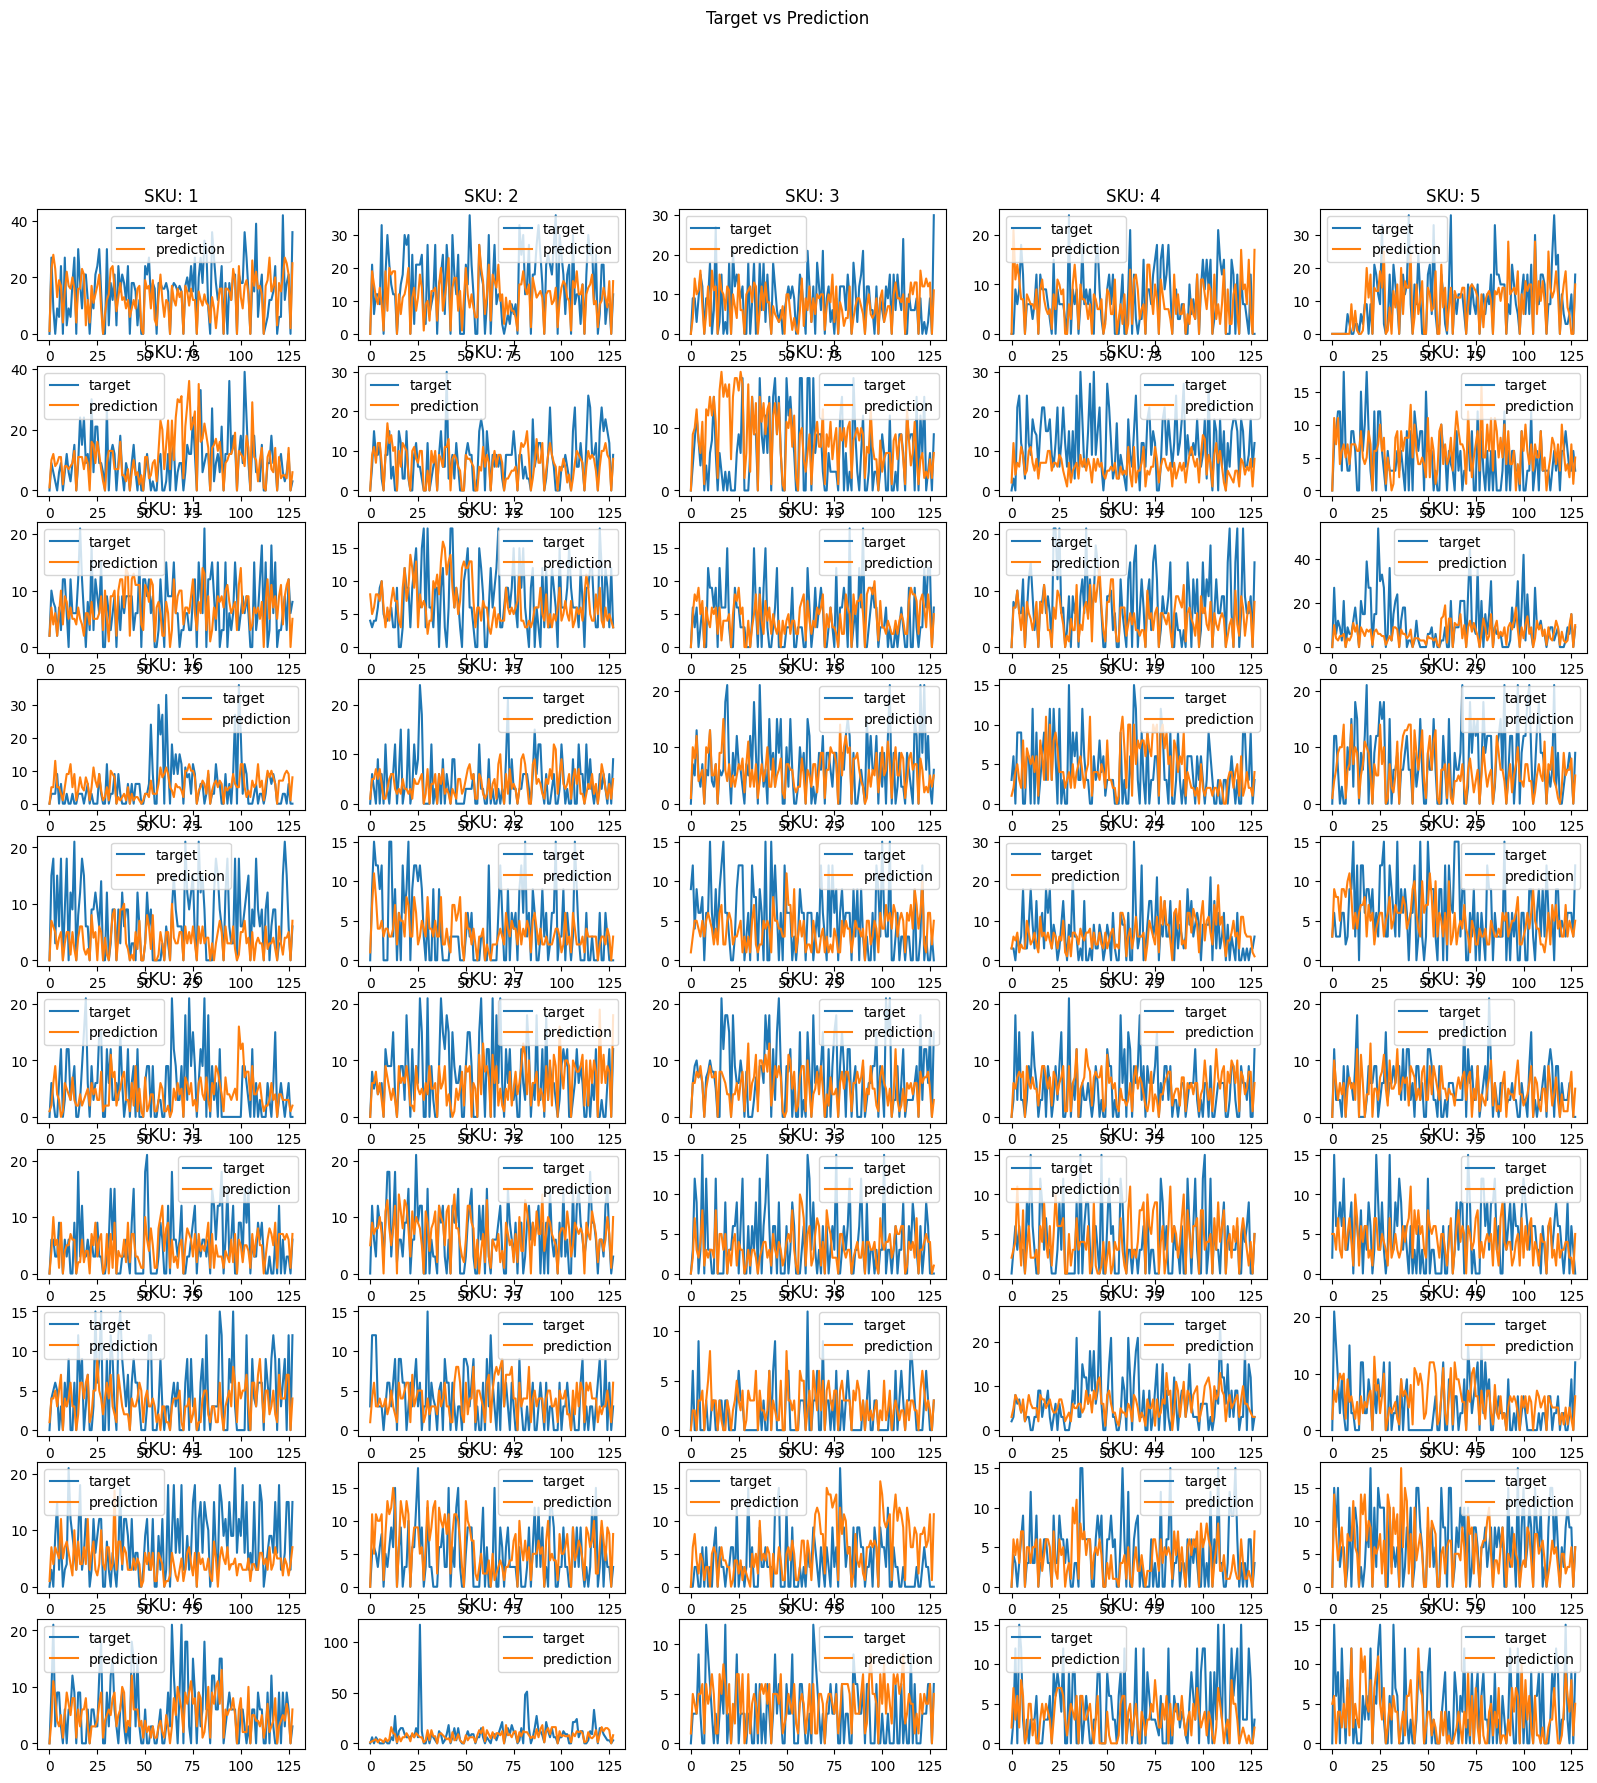

In [10]:
# make 50 subplots in a 10x5 grid and plot the target and prediction
fig, axs = plt.subplots(10, 5, figsize=(20, 20))
fig.suptitle('Target vs Prediction')
for i in range(10):
    for j in range(5):
        axs[i, j].plot(global_results['target'][i*5+j], label='target')
        axs[i, j].plot(global_results['prediction'][i*5+j], label='prediction')
        axs[i, j].legend()
        axs[i, j].set_title('SKU: ' + str(i*5+j+1))
plt.show()

In [11]:
# get the metrics of the results dataframe
metrics = global_results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     5.849925e+00
MAPE     4.050425e+15
MASE     7.630272e-01
SMAPE    8.602160e-01
RMSSE    7.775690e-01
dtype: float64

In [12]:
promo_comparison_results = results.copy()

# filter promo_comparison_results to get only the skus with flag_promo = 2
promo_comparison_results = promo_comparison_results[promo_comparison_results['flag_promo'] == 2]
promo_comparison_results = promo_comparison_results.reset_index(drop=True)

promo_skus = promo_comparison_results['idSku'].unique()

In [13]:
promo_results = promo_comparison_results[['idSku', 'target_promo', 'prediction_promo']]

In [14]:
promo_results = promo_comparison_results[['idSku', 'target_promo', 'prediction_promo']]

promo_results['RMSE'] = np.nan
promo_results['MAPE'] = np.nan
promo_results['MASE'] = np.nan
promo_results['SMAPE'] = np.nan
promo_results['RMSSE'] = np.nan

# calculate rmse for each sku and append to promo_results dataframe
i = 0
for ps in promo_skus:
    t = pd.Series(promo_results[promo_results['idSku'] == ps]['target_promo'].tolist()[0])
    p = pd.Series(promo_results[promo_results['idSku'] == ps]['prediction_promo'].tolist()[0])
    y_train = train[train['idSku'] == ps]['udsVenta']
    promo_results['RMSE'][i] = rmse(t, p)
    promo_results['MAPE'][i] = mape(t, p)
    promo_results['MASE'][i] = mase(t, p, y_train=y_train)
    promo_results['SMAPE'][i] = smape(t, p)
    promo_results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
    i+=1
promo_results

C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\3942801977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_results['RMSE'] = np.nan
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\3942801977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_results['MAPE'] = np.nan
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\3942801977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,idSku,target_promo,prediction_promo,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[6, 18, 27, 0, 30, 18, 9, 21, 21, 12, 0, 12, 9...","[16, 20, 16, 4, 16, 16, 23, 21, 3, 12, 4, 17, ...",9.197049,2.251800e+15,0.600022,0.518381,0.636146
1,2,"[15, 12, 12, 0, 9, 15, 18, 30, 27, 30, 0, 24, ...","[18, 19, 19, 0, 12, 6, 11, 12, 15, 20, 0, 11, ...",9.528903,8.363828e+14,0.566730,0.669839,0.552355
2,3,"[0, 6, 27, 0, 3, 15, 0, 3, 0, 18, 0, 21, 12, 1...","[16, 11, 12, 0, 15, 11, 10, 6, 12, 11, 0, 10, ...",7.126410,5.211308e+15,0.633123,0.718072,0.623013
3,4,"[3, 6, 12, 0, 12, 9, 9, 9, 6, 3, 0, 15, 0, 9, ...","[6, 5, 9, 0, 9, 11, 7, 5, 4, 5, 1, 8, 5, 11, 1...",5.465476,9.007199e+14,0.486900,0.582375,0.527891
4,5,"[0, 3, 3, 0, 6, 3, 9, 9, 0, 9, 0, 21, 18, 12, ...","[1, 7, 1, 0, 0, 1, 8, 20, 11, 18, 0, 14, 13, 1...",7.497619,7.720457e+14,0.578764,0.550282,0.592202
5,6,"[3, 9, 15, 0, 9, 24, 15, 24, 9, 12, 3, 30, 6, ...","[8, 9, 13, 0, 11, 11, 11, 7, 11, 9, 0, 16, 15,...",10.361329,1.544091e+15,0.799646,0.561741,0.840278
6,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 12, 6, 15, ...","[0, 9, 10, 13, 8, 6, 11, 1, 13, 12, 15, 9, 13,...",5.263734,3.416524e+15,0.634717,0.750882,0.691668
7,9,"[18, 15, 14, 6, 15, 21, 21, 15, 15, 18, 9, 6, ...","[7, 5, 8, 3, 7, 7, 7, 7, 10, 10, 5, 7, 7, 6, 9...",8.975363,1.479754e+15,1.242974,0.804313,1.148732
8,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 0, 9, ...","[0, 11, 7, 11, 4, 6, 7, 5, 7, 4, 7, 8, 8, 13, ...",4.325147,4.270655e+15,0.588040,0.754687,0.602044
9,11,"[2, 10, 8, 7, 2, 7, 3, 12, 12, 6, 0, 6, 9, 9, ...","[2, 7, 4, 6, 2, 6, 10, 4, 9, 8, 5, 7, 14, 13, ...",5.242400,2.795338e+15,0.767001,0.772849,0.735064


In [15]:
# get the metrics of the results dataframe
metrics = promo_results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     6.571044e+00
MAPE     3.353708e+15
MASE     8.208276e-01
SMAPE    8.242881e-01
RMSSE    8.354257e-01
dtype: float64

In [16]:
non_promo_results = promo_comparison_results[['idSku', 'target_no_promo', 'prediction_no_promo']]

non_promo_results['RMSE'] = np.nan
non_promo_results['MAPE'] = np.nan
non_promo_results['MASE'] = np.nan
non_promo_results['SMAPE'] = np.nan
non_promo_results['RMSSE'] = np.nan

# calculate rmse for each sku and append to non_promo_results dataframe
i = 0
for ps in promo_skus:
    t = pd.Series(non_promo_results[non_promo_results['idSku'] == ps]['target_no_promo'].tolist()[0])
    p = pd.Series(non_promo_results[non_promo_results['idSku'] == ps]['prediction_no_promo'].tolist()[0])
    y_train = train[train['idSku'] == ps]['udsVenta']
    non_promo_results['RMSE'][i] = rmse(t, p)
    non_promo_results['MAPE'][i] = mape(t, p)
    non_promo_results['MASE'][i] = mase(t, p, y_train=y_train)
    non_promo_results['SMAPE'][i] = smape(t, p)
    non_promo_results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
    i+=1
non_promo_results

C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\1772096320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promo_results['RMSE'] = np.nan
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\1772096320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promo_results['MAPE'] = np.nan
C:\Users\96gar\AppData\Local\Temp\ipykernel_3532\1772096320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,idSku,target_no_promo,prediction_no_promo,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 18, 12, 2...","[1, 23, 28, 23, 13, 19, 17, 4, 15, 22, 17, 13,...",9.057289,3.416524e+15,0.628920,0.708470,0.626479
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 6, 27...","[0, 19, 15, 11, 9, 14, 9, 1, 19, 7, 20, 11, 16...",8.856130,3.804765e+15,0.464133,0.687541,0.513357
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 3, 15, 6,...","[0, 4, 14, 10, 11, 16, 7, 0, 5, 12, 2, 13, 8, ...",7.044195,4.425951e+15,0.605819,0.748196,0.615825
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 9, 6, 9, 3...","[0, 21, 11, 14, 11, 7, 7, 0, 8, 7, 6, 6, 3, 6,...",7.153490,8.929551e+15,0.658671,0.837592,0.690930
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 15, 36, 9, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 14, 14, 24, ...",9.194264,2.018855e+15,0.640147,0.595488,0.726213
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 0, 9, 6, 0,...","[1, 10, 12, 8, 9, 11, 11, 2, 8, 8, 7, 5, 3, 7,...",6.633250,8.153068e+15,0.514962,0.827041,0.537940
6,8,"[8, 15, 6, 0, 6, 3, 0, 3, 0, 3, 0, 0, 0, 6, 9,...","[12, 15, 11, 2, 16, 19, 15, 17, 15, 17, 5, 15,...",7.492854,1.145201e+16,0.993110,1.069262,0.984580
7,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 6, 15, ...","[2, 12, 4, 7, 6, 11, 9, 4, 5, 10, 11, 5, 8, 6,...",9.505897,1.087076e+15,1.219797,0.817286,1.216633
8,10,"[9, 6, 0, 0, 15, 6, 10, 18, 9, 3, 0, 12, 0, 12...","[7, 7, 6, 6, 9, 5, 4, 5, 9, 7, 0, 6, 6, 7, 10,...",4.566962,7.591782e+15,0.661425,0.991579,0.635703
9,11,"[12, 6, 6, 6, 12, 21, 12, 6, 0, 8, 3, 18, 3, 1...","[7, 5, 5, 4, 7, 5, 4, 2, 6, 6, 4, 8, 5, 5, 5, ...",5.742075,4.053240e+15,0.832222,0.808778,0.805126


In [17]:
# get the metrics of the results dataframe
metrics = non_promo_results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     5.794877e+00
MAPE     4.526038e+15
MASE     7.451087e-01
SMAPE    8.907201e-01
RMSSE    7.472504e-01
dtype: float64